In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(
    style='ticks',
    font_scale=1.5
)

In [89]:
η = 0.01
H = 0.1
W = 1
w = 0.1

- p: freq of η
- q: freq of H
- x: freq of A within η
- 1-x: freq of B within η
- y: freq of A within H
- 1-y: freq of B within H

In [104]:
def recursion(p, x, y, W, w, e):
    if np.random.rand() > e:
        W, w = w, W
    
    q = 1 - p
    
    pp = p * (x * W + (1 - x) * w)
    meanW = pp + q * (y * W +  (1 - y) * w)
    pp /= meanW

    xx = (x * W * ((1 - η) * x + η) + 
    (1 - x) * w * (1 - η) * x) / (x * W + (1 - x) * w) 
    yy = (y * W * ((1 - H) * y + H) + 
    (1 - y) * w * (1 - H) * y) / (y * W + (1 - y) * w)

    return pp, xx, yy

In [116]:
n = 500
p = np.array([0.5]*n)
x = np.array([0.1]*n)
y = np.array([0.1]*n)

for t in range(1, n//2):
    p[t], x[t], y[t] = recursion(
        p[t-1], x[t-1], y[t-1], W, w, 0.7
    )
assert p[t] < 1e-6
p[t] = 0.5
x[t] = y[t]
for t in range(n//2, n):
    p[t], x[t], y[t] = recursion(
        p[t-1], x[t-1], y[t-1], W, w, 0.7
    )

q = 1 - p

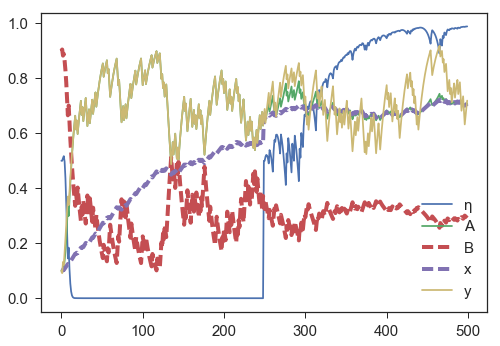

In [117]:
plt.plot(p, label='η')
plt.plot(p*x + q*y, label='A')
plt.plot(p*(1-x) + q*(1-y), lw=4, ls='--', label='B')
plt.plot(x, lw=4, ls='--', label='x')
plt.plot(y, label='y')
plt.legend();